In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
#Separate dependant variable from the data and use it for analysis. But first do EDA
ntrain = df_train.shape[0]
ntest = df_test.shape[0]

#Save the ID and drop it from the main table

train_ID = df_train['Id']
test_ID = df_test['Id']

df_train.drop('Id', axis = 1, inplace = True)
df_test.drop('Id', axis = 1, inplace = True)

In [4]:
#Dependant variable
y_train = df_train.SalePrice.values
#Whole data set
df = pd.concat((df_train, df_test)).reset_index(drop=True)
#Remove #Barplot of OverallQual with PooQC
sns.set(style="whitegrid")
#ax = sns.barplot(x="PoolQC", y="OverallQual", data=df)

df_p = pd.concat([df['PoolQC'], df['OverallQual']], axis = 1)
fig = sns.boxplot(x = 'PoolQC', y = 'OverallQual', data = df_p)
fig.axis(ymin = 4, ymax = 15)SalePrice from the whole dataset
df.drop(['SalePrice'], axis = 1, inplace = True)
df.shape

C:\Users\mmalhotra\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


(2919, 79)

(-0.5, 2.5, 4, 15)

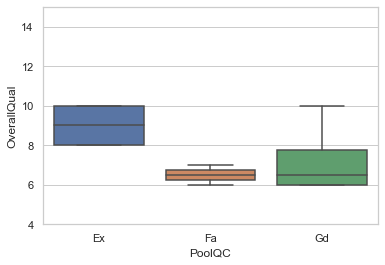

In [18]:
#Barplot of OverallQual with PooQC
sns.set(style="whitegrid")
#ax = sns.barplot(x="PoolQC", y="OverallQual", data=df)

df_p = pd.concat([df['PoolQC'], df['OverallQual']], axis = 1)
fig = sns.boxplot(x = 'PoolQC', y = 'OverallQual', data = df_p)
fig.axis(ymin = 4, ymax = 15)

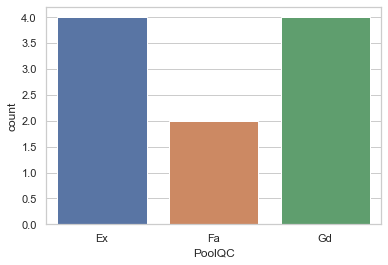

In [19]:
sns.countplot(df['PoolQC'])

In [5]:
df.loc[df['GarageType'] == 'Detchd', ('GarageQual', 'GarageType', 'GarageCond', 'GarageQual', 'GarageYrBlt')]

,GarageQual,GarageType,GarageCond,GarageQual,GarageYrBlt
3,TA,Detchd,TA,TA,1998.0
8,Fa,Detchd,TA,Fa,1931.0
10,TA,Detchd,TA,TA,1965.0
12,TA,Detchd,TA,TA,1962.0
15,TA,Detchd,TA,TA,1991.0
...,...,...,...,...,...
2886,TA,Detchd,TA,TA,1942.0
2887,TA,Detchd,TA,TA,1950.0
2889,TA,Detchd,TA,TA,1925.0
2890,TA,Detchd,TA,TA,1957.0


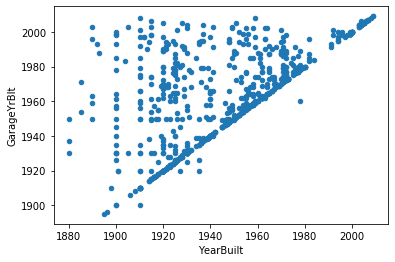

In [6]:
yrb = df.loc[df['GarageType'] == 'Detchd','YearBuilt']
grb = df.loc[df['GarageType'] == 'Detchd','GarageYrBlt']
f2 = pd.concat([yrb, grb], axis = 1)
f2.plot.scatter(x = 'YearBuilt', y = 'GarageYrBlt')

Let us assume that the year built of the garage is same of the House built. Because the garage yr bulit is the same or more than the house built for detached garages. In our case we will assume that they were built the same year. 
Note: there are garage which were built before house built.

In [7]:
df.loc[(df['GarageQual'].isnull()) & (df['GarageType'].notnull()),('GarageYrBlt', 'YearBuilt', 'YearRemodAdd')]

,GarageYrBlt,YearBuilt,YearRemodAdd
2126,NaN,1910,1983
2576,NaN,1923,1999


In [8]:
#convert nan to 1910
df.loc[2126, 'GarageYrBlt'] = 1910

(-0.5, 4.5, 4, 15)

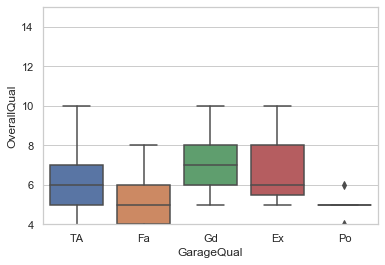

In [9]:
sns.set(style="whitegrid")
#ax = sns.barplot(x="PoolQC", y="OverallQual", data=df)

df_p = pd.concat([df['GarageQual'], df['OverallQual']], axis = 1)
fig = sns.boxplot(x = 'GarageQual', y = 'OverallQual', data = df_p)
fig.axis(ymin = 4, ymax = 15)

In [10]:
df.loc[(df['GarageQual'].isnull()) & (df['GarageType'].notnull()),('OverallCond', 'GarageQual', 'OverallQual')]

,OverallCond,GarageQual,OverallQual
2126,8,NaN,6
2576,6,NaN,5


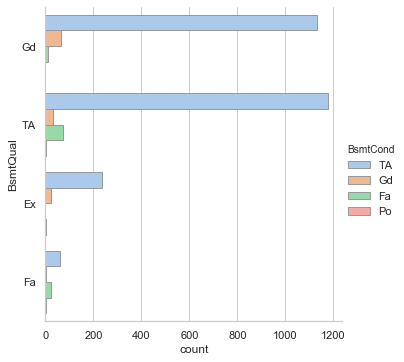

In [12]:
f1 = pd.concat([df['BsmtQual'], df['BsmtCond']], axis = 1)
sns.catplot(y="BsmtQual", hue="BsmtCond", kind="count",
            palette="pastel", edgecolor=".6",
            data=f1)

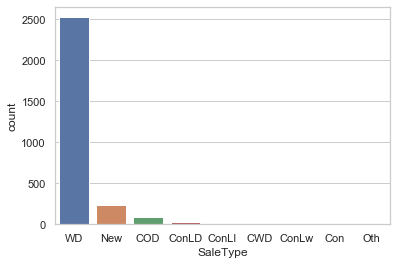

In [13]:
#Plot of SaleType
sns.countplot(df['SaleType'])

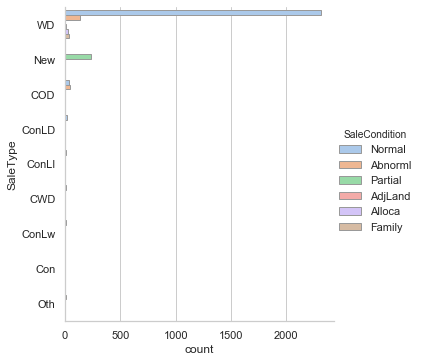

In [14]:
f2 = pd.concat([df['SaleType'], df['SaleCondition']], axis = 1)
sns.catplot(y="SaleType", hue="SaleCondition", kind="count",
            palette="pastel", edgecolor=".6",
            data=f2)

[Text(0, 0, 'VinylSd'),
 Text(0, 0, 'MetalSd'),
 Text(0, 0, 'Wd Sdng'),
 Text(0, 0, 'HdBoard'),
 Text(0, 0, 'BrkFace'),
 Text(0, 0, 'WdShing'),
 Text(0, 0, 'CemntBd'),
 Text(0, 0, 'Plywood'),
 Text(0, 0, 'AsbShng'),
 Text(0, 0, 'Stucco'),
 Text(0, 0, 'BrkComm'),
 Text(0, 0, 'AsphShn'),
 Text(0, 0, 'Stone'),
 Text(0, 0, 'ImStucc'),
 Text(0, 0, 'CBlock')]

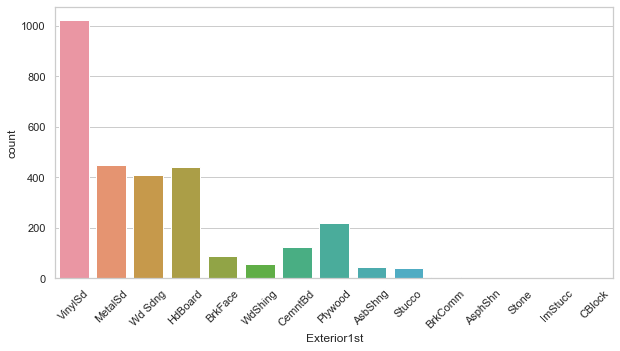

In [17]:
plt.figure(figsize=(10,5))
fig = sns.countplot(df['Exterior1st'])
fig.set_xticklabels(fig.get_xticklabels(), rotation=45)

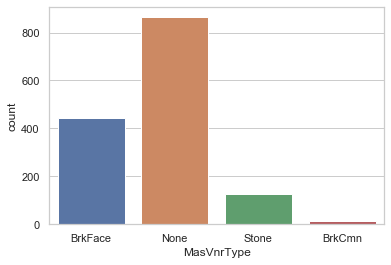

In [20]:
sns.countplot(df_train['MasVnrType'])

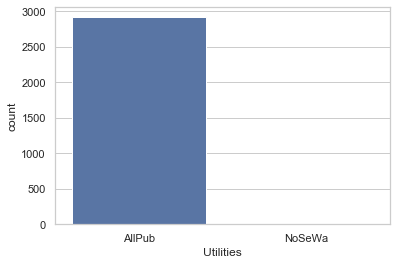

In [21]:
sns.countplot(df['Utilities'])

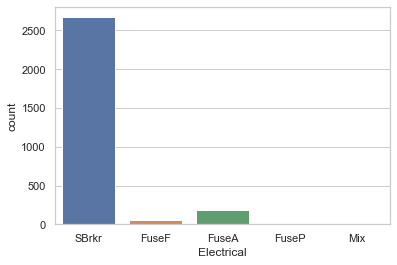

In [22]:
sns.countplot(df['Electrical'])

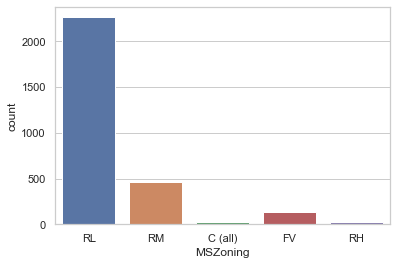

In [23]:
sns.countplot(df['MSZoning'])

In [32]:
df.loc[df['KitchenQual'].isnull(), ['KitchenQual', 'KitchenAbvGr']]

,KitchenQual,KitchenAbvGr
1555,NaN,1


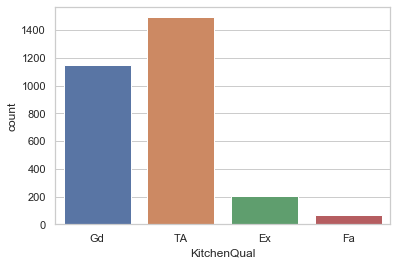

In [26]:
sns.countplot(df['KitchenQual'])

In [34]:
df['KitchenAbvGr'].describe()

count    2919.000000
mean        1.044536
std         0.214462
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: KitchenAbvGr, dtype: float64

In [39]:
df.loc[df['GarageYrBlt'] > 2010, ['GarageYrBlt', 'YearBuilt', 'GarageType']]

,GarageYrBlt,YearBuilt,GarageType
2592,2207.0,2006,Attchd
